In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/loisstetson/Project-4-Meteorite-Landings/main/Resources/Meteorite_Landings.csv')

# Display the first few rows of the dataset
data

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
# Check for missing values
print(data.isnull().sum())

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [5]:
data_cleaned = data.dropna(subset=['GeoLocation']).drop(columns=['nametype'])
data_cleaned

,name,id,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


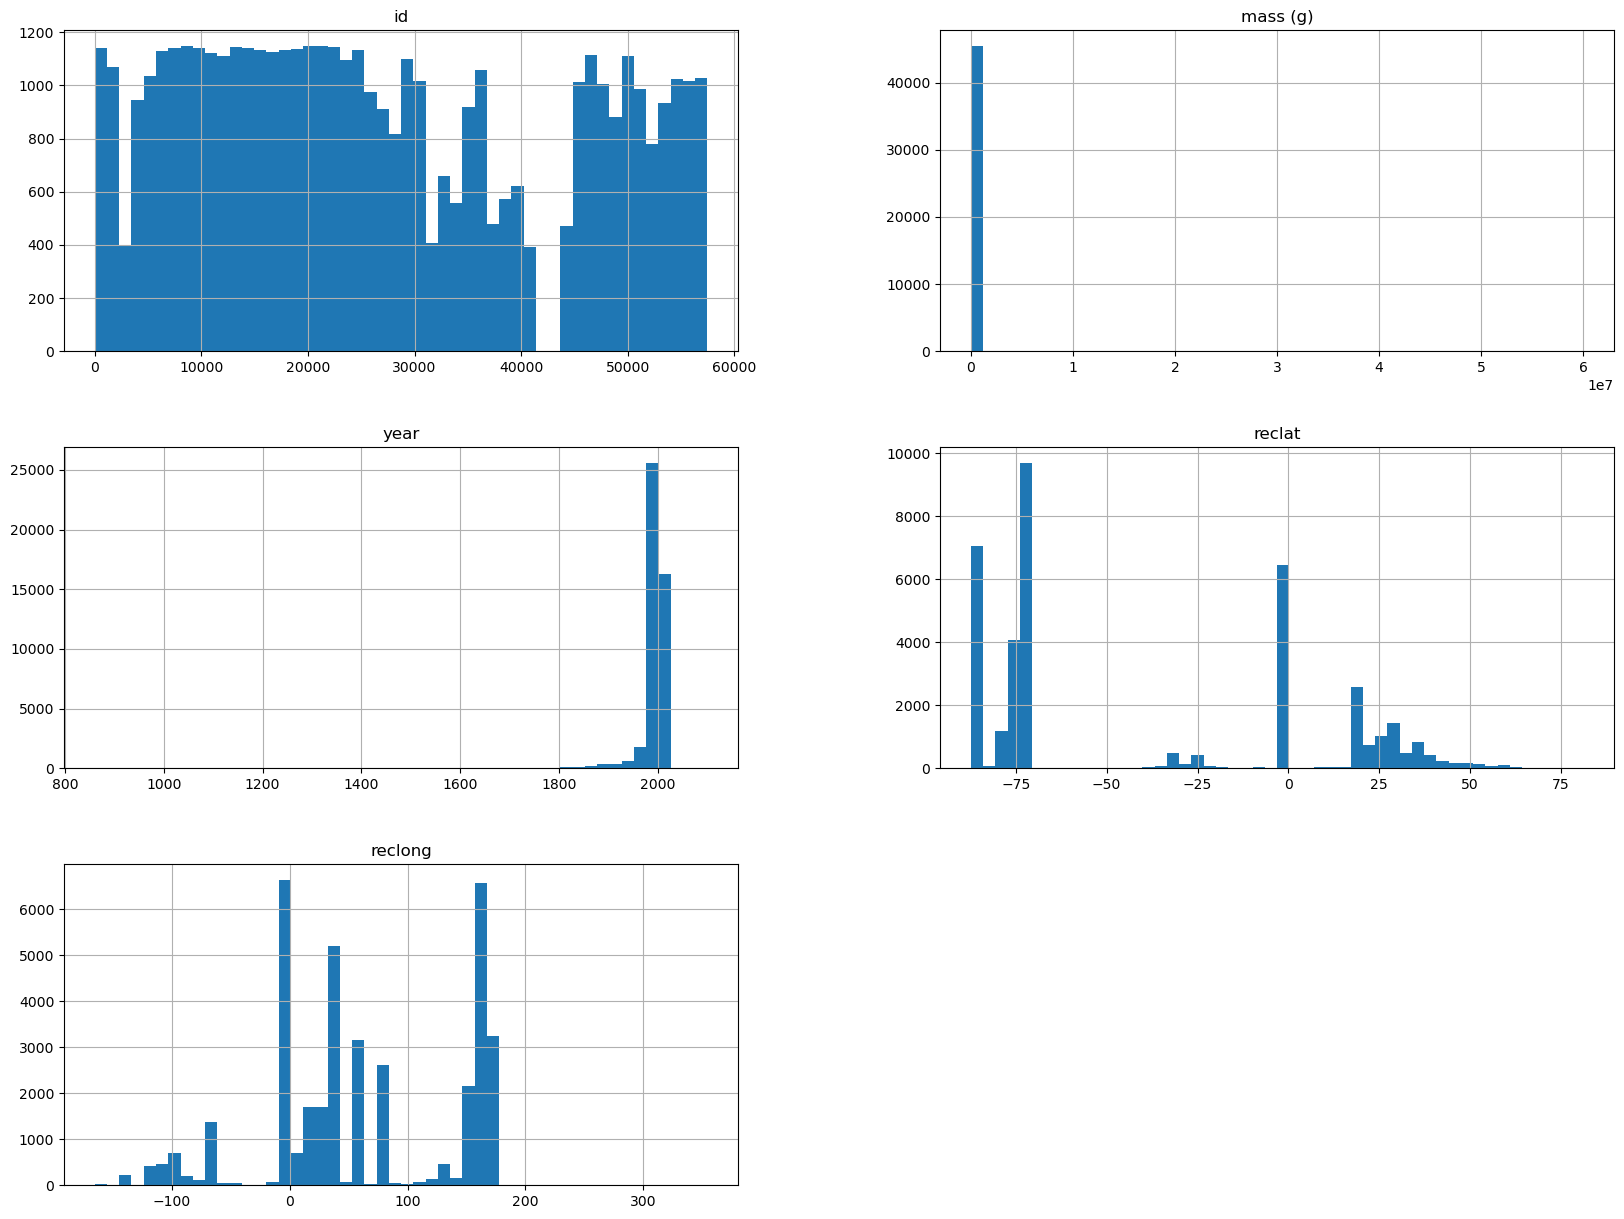

In [6]:
# Histograms for distribution
data.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Lois\AppData\Local\Temp\ipykernel_13084\169468591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


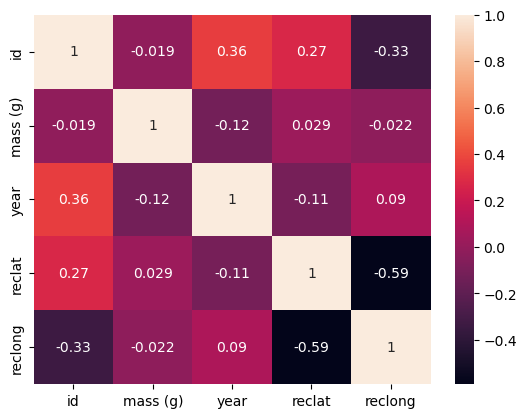

In [7]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [8]:
# One-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['name', 'recclass', 'fall'])

data_encoded

,id,mass (g),year,reclat,reclong,GeoLocation,name_Aachen,name_Aarhus,name_Abajo,name_Abar al' Uj 001,...,recclass_Relict iron,recclass_Stone-uncl,recclass_Stone-ung,recclass_Unknown,recclass_Ureilite,recclass_Ureilite-an,recclass_Ureilite-pmict,recclass_Winonaite,fall_Fell,fall_Found
0,1,21.0,1880.0,50.77500,6.08333,"(50.775, 6.08333)",1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,720.0,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6,107000.0,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10,1914.0,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,370,780.0,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,31356,172.0,1990.0,29.03700,17.01850,"(29.037, 17.0185)",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45712,30409,46.0,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45713,30410,3.3,1939.0,49.25000,17.66667,"(49.25, 17.66667)",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45714,31357,2167.0,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# Handling missing values (example: fill with median)
data_encoded.fillna(data_encoded.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

C:\Users\Lois\AppData\Local\Temp\ipykernel_13084\2280735298.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_encoded.fillna(data_encoded.median(), inplace=True)
